## Linear Regression with eaget api  (立即执行)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tfe.enable_eager_execution()

In [3]:
# Training Data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

In [5]:
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

def linear_regerssion(inputs):
    return inputs * W + b

def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2) / (2* n_samples))

In [6]:
#随机梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# 计算梯度
grad = tfe.implicit_gradients(mean_square_fn)

In [9]:
print("Ininial cost={:.9f}".format(mean_square_fn(linear_regerssion, train_X, train_Y)), 
     "W=", W.numpy(), "b=", b.numpy())

Ininial cost=8.351940155 W= -0.22717322 b= -0.12936635


Epoch:0100 cost= 0.111499615 W= 0.35704795 b= 0.051470347
Epoch:0200 cost= 0.104044080 W= 0.3449918 b= 0.136943
Epoch:0300 cost= 0.098196402 W= 0.33431453 b= 0.21264009
Epoch:0400 cost= 0.093609810 W= 0.32485843 b= 0.27967963
Epoch:0500 cost= 0.090012379 W= 0.31648383 b= 0.33905178
Epoch:0600 cost= 0.087190785 W= 0.309067 b= 0.39163354
Epoch:0700 cost= 0.084977694 W= 0.3024985 b= 0.4382015
Epoch:0800 cost= 0.083241880 W= 0.2966812 b= 0.47944352
Epoch:0900 cost= 0.081880398 W= 0.29152924 b= 0.51596856
Epoch:1000 cost= 0.080812544 W= 0.28696647 b= 0.54831636


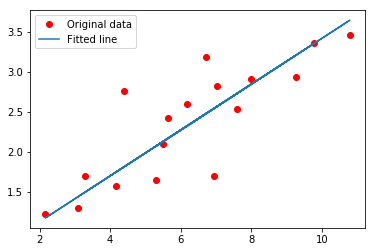

In [10]:
# 训练
for step in range(num_steps):
    optimizer.apply_gradients(grad(linear_regerssion, train_X, train_Y))
    if (step + 1) % display_step == 0:
        print("Epoch:" '%04d' % (step + 1), "cost=", "{:.9f}".format(mean_square_fn(linear_regerssion, 
                                                                                   train_X, train_Y)),
             "W=", W.numpy(), "b=", b.numpy())
# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()